In [4]:
import numpy as np
import open3d as o3d
import random
import scipy
import matplotlib 
from matplotlib import pyplot as plt
from scipy.linalg import expm, norm


In [5]:
def make_open3d_point_cloud(xyz, color=None):
  #convert array to point cloud sets
  pcd = o3d.geometry.PointCloud()
  pcd.points = o3d.utility.Vector3dVector(xyz)
  if color is not None:
    pcd.colors = o3d.utility.Vector3dVector(color)
  return pcd

# Rotation matrix along axis with angle theta
def M(axis, theta):
  return expm(np.cross(np.eye(3), axis / norm(axis) * theta))

def sample_random_trans(pcd, randg, rotation_range=360):
  """ rotation """
  T = np.eye(4)
  R = M(randg.rand(3) - 0.5, rotation_range * np.pi / 180.0 * (randg.rand(1) - 0.5))
  T[:3, :3] = R
  T[:3, 3] = R.dot(-np.mean(pcd, axis=0))
  return T

def scale(pcd, min_scale=0.8, max_scale=1.2):
    scale = min_scale + \
          (max_scale - min_scale) * random.random()
    return pcd * scale

def apply_transform( pts, trans):
    R = trans[:3, :3]
    T = trans[:3, 3]
    pts = pts @ R.T + T
    return pts



In [6]:
data0 = np.load('/Users/wuhongyu/Downloads/data_f25/scene0220_01/pcd/225.npz')
data1 = np.load('/Users/wuhongyu/Downloads/data_f25/scene0220_01/pcd/1775.npz')
xyz0 = data0["pcd"]
xyz1 = data1["pcd"]
#dummy color
color0 = np.ones((xyz0.shape[0], 3))
color1 = np.ones((xyz1.shape[0], 3))

#random rotation
randg =  np.random.RandomState()
rotation_range = 360
T0 = sample_random_trans(xyz0, randg, rotation_range)
T1 = sample_random_trans(xyz1, randg, rotation_range)
trans = T1 @ np.linalg.inv(T0)


In [7]:
# transformation(rotation + translation)
xyz0_T= apply_transform(xyz0, T0)
xyz1_T = apply_transform(xyz1, T1)

In [8]:
# Make point clouds using voxelized points
pcd0 = make_open3d_point_cloud(xyz0_T)
pcd1 = make_open3d_point_cloud(xyz1_T)

In [9]:
trans

array([[-0.48434384,  0.33240946,  0.80926818, -0.04230788],
       [-0.26155229, -0.9377192 ,  0.2286331 , -0.92157265],
       [ 0.83486612, -0.10092891,  0.54112098,  0.12982831],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

# FFD

In [10]:
%matplotlib inline
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt

import pygem
print(pygem.__version__)
from pygem import FFD

2.0.0


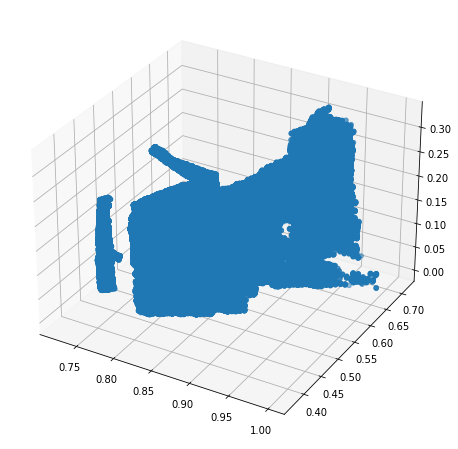

In [94]:
def mesh_points(num_pts = 2000):
    indices = np.arange(0, num_pts, dtype=float) + 0.5

    phi = np.arccos(1 - 2*indices/num_pts)
    theta = np.pi * (1 + 5**0.5) * indices

    return np.array([np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)]).T

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range
 
 
xyz0_N = normalization(xyz0)

mesh = mesh_points()
plt.figure(figsize=(8,8)).add_subplot(111, projection='3d').scatter(*xyz0_N.T);
plt.show()

In [81]:
ffd  =  FFD ([ 2 ,  2 ,  2 ])
print(ffd)

conversion_unit = 1.0
n_control_points = [2 2 2]

box_length = [1. 1. 1.]
box_origin = [0. 0. 0.]
rot_angle  = [0. 0. 0.]

array_mu_x =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_y =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

array_mu_z =
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]

rotation_matrix = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

position_vertices = [[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



In [85]:
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

ffd.array_mu_x[1, 1, 1] = 3
ffd.array_mu_z[1, 1, 1] = 0.8

print()
print('Movements of point[{}, {}, {}] along x: {}'.format(1, 1, 1, ffd.array_mu_x[1, 1, 1]))
print('Movements of point[{}, {}, {}] along z: {}'.format(1, 1, 1, ffd.array_mu_z[1, 1, 1]))

Movements of point[1, 1, 1] along x: 2.0
Movements of point[1, 1, 1] along z: 0.8

Movements of point[1, 1, 1] along x: 3.0
Movements of point[1, 1, 1] along z: 0.8


In [98]:
new_mesh = ffd(xyz0_N)
print(type(new_mesh), new_mesh.shape)

<class 'numpy.ndarray'> (297793, 3)


In [92]:
.max()

8.349535975871492

array([[0.75245103, 0.55973091, 0.25436467],
       [0.75247221, 0.55937642, 0.25437703],
       [0.75129192, 0.55857458, 0.25394802],
       ...,
       [0.77169785, 0.37258438, 0.08599526],
       [0.77172044, 0.37220627, 0.08600845],
       [0.77174303, 0.37182815, 0.08602164]])

In [99]:
new_mesh

array([[1.07384341, 0.55973091, 0.3400693 ],
       [1.07368569, 0.55937642, 0.34003396],
       [1.07100174, 0.55857458, 0.33920397],
       ...,
       [0.84587459, 0.37258438, 0.10577572],
       [0.84583543, 0.37220627, 0.10577245],
       [0.84579624, 0.37182815, 0.10576916]])

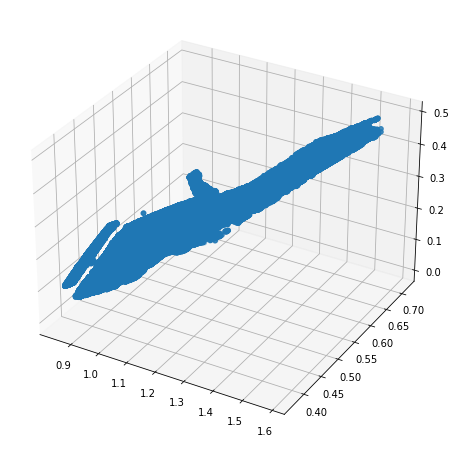

In [100]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(*new_mesh.T)
# ax.scatter(*ffd.control_points().T, s=50, c='red')


# Visuzalize

In [102]:
print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = make_open3d_point_cloud(new_mesh)
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

Load a ply point cloud, print it, and render it
PointCloud with 297793 points.
[[1.07384341 0.55973091 0.3400693 ]
 [1.07368569 0.55937642 0.34003396]
 [1.07100174 0.55857458 0.33920397]
 ...
 [0.84587459 0.37258438 0.10577572]
 [0.84583543 0.37220627 0.10577245]
 [0.84579624 0.37182815 0.10576916]]
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


2023-03-03 19:17:22.959 python[99587:4793371] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_bundleIdentifierWithReply:) block performed very slowly (21482.75 secs).


In [22]:
import torch
print(torch.__version__)

1.13.0
